In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/banu/Downloads/pandasprojects/datasets/supermarket_sales - Sheet1.xls',parse_dates=['Date'])

In [3]:
import warnings

warnings.filterwarnings('ignore')



In [4]:
data.shape

(1000, 17)

In [5]:
print("Number of Columns",data.shape[0])
print("Number of Rows",data.shape[1])

Number of Columns 1000
Number of Rows 17


In [6]:
data.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)

In [8]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

In [9]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']


Univariate Analysis
1. Find Aggregate Sales Among Branches. (Categorical Column)

<Axes: xlabel='count', ylabel='Branch'>

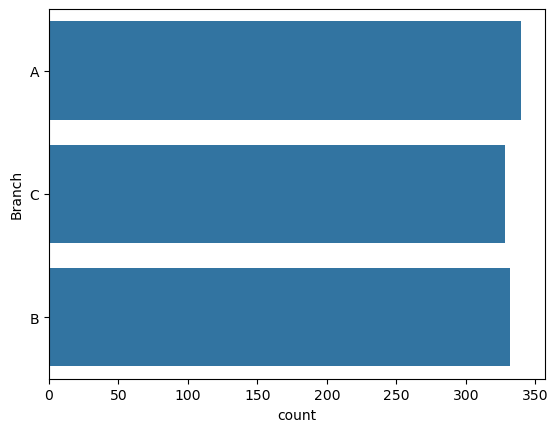

In [11]:
sns.countplot(data['Branch'])


<Axes: ylabel='count'>

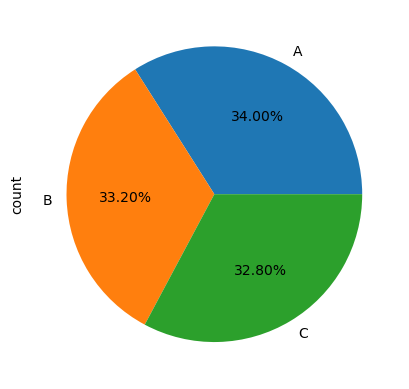

In [12]:
data['Branch'].value_counts().plot(kind="pie",autopct="%1.2f%%")

2.Find The Most Popular Payment Method Used By Customers (Categorical Column)

<Axes: xlabel='Payment'>

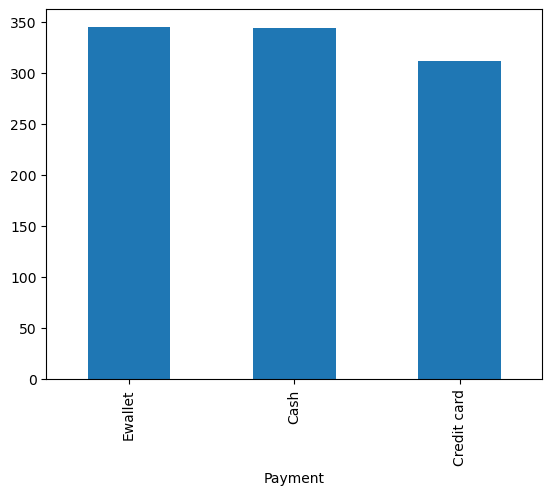

In [14]:
data['Payment'].value_counts().plot(kind="bar")

3. Find The Distribution of Customer Ratings. (Numerical Column)

<Axes: xlabel='Rating', ylabel='Density'>

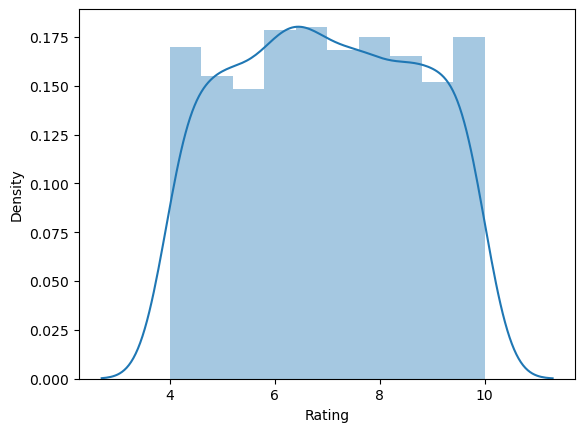

In [15]:
sns.distplot(data['Rating'])

In [16]:
data['Rating'].skew()

0.00900964876573073

<Axes: ylabel='cogs'>

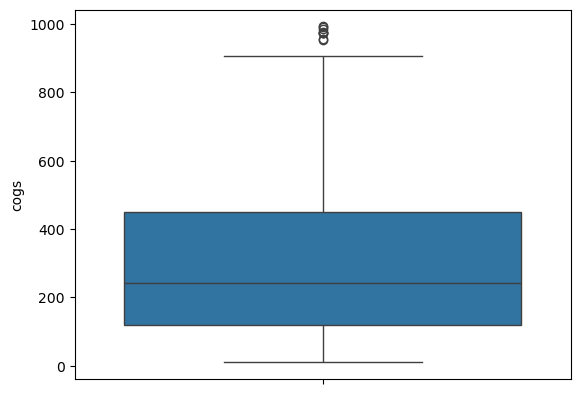

In [17]:
sns.boxplot(data['cogs'])


Bivariate Analysis / Multivariate Analysis
1. Does The Cost of Goods Sold Affect The Ratings That The Customers Provide? (Numerical - Numerical)

In [19]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

In [20]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

<Axes: xlabel='cogs', ylabel='Rating'>

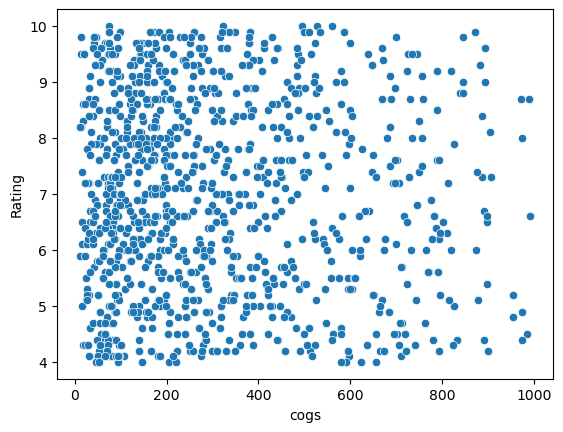

In [22]:
sns.scatterplot(x=data['cogs'],y=data['Rating'])


3. Find The Most Profitable Branch As Per Gross Income. (Numerical - Categorical)



<Axes: xlabel='Branch', ylabel='gross income'>

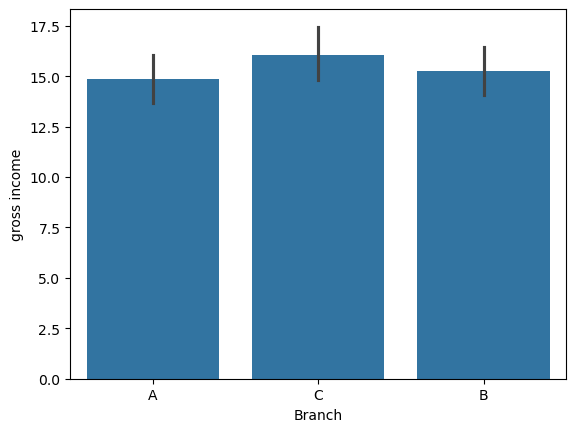

In [24]:
sns.barplot(x=data['Branch'],y=data['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

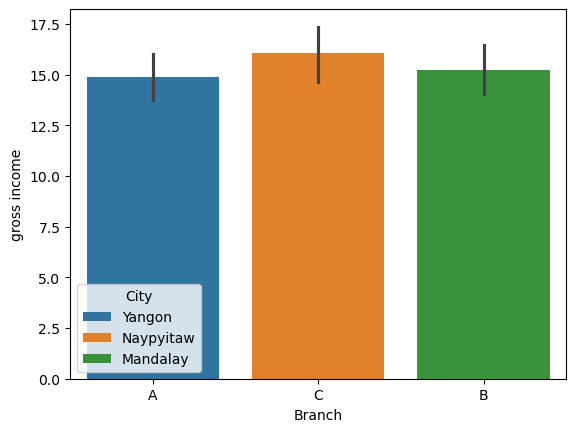

In [25]:
sns.barplot(x=data['Branch'],y=data['gross income'],hue=data['City'])

4. Is There Any Relationship Between Gender And Gross Income? (Numerical - Categorical

<Axes: xlabel='Gender', ylabel='gross income'>

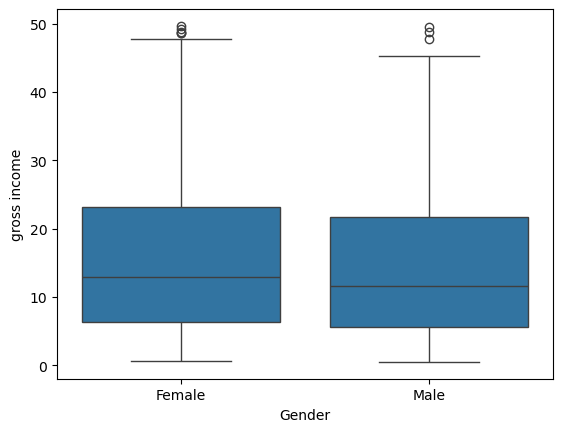

In [27]:
sns.boxplot(x=data['Gender'],y=data['gross income'])

5. Find The Product Line That Generates The Most Income. (Numerical - Categorical)

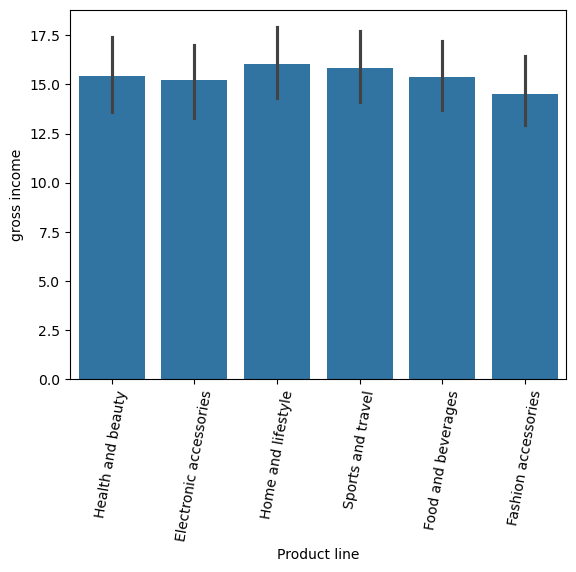

In [29]:
sns.barplot(x=data['Product line'],y=data['gross income'])
plt.xticks(rotation=80)
plt.show()

 Find Different Payment Methods Used By Customers Citywise.(Categorical -Categorical)

In [30]:
pd.crosstab(data['City'],data['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<Axes: xlabel='Payment', ylabel='City'>

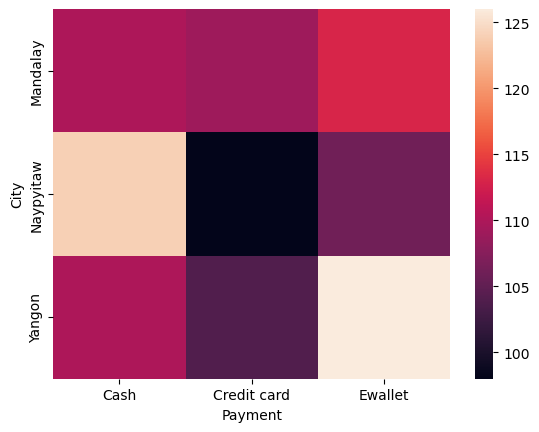

In [31]:
sns.heatmap(pd.crosstab(data['City'],data['Payment']))


<Axes: >

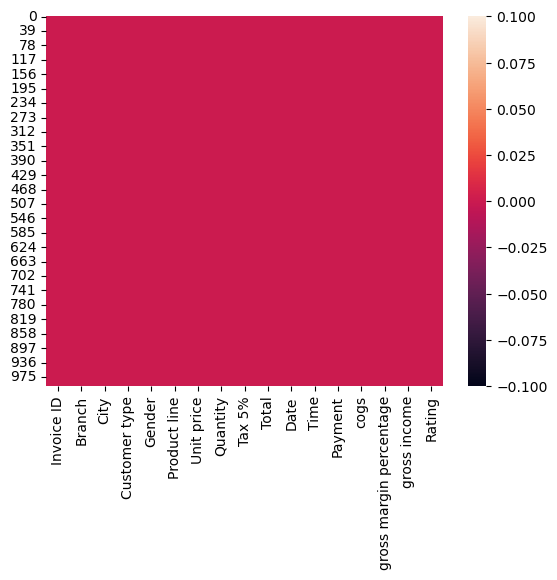

In [37]:
sns.heatmap(data.isnull())


In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True)


What Will Be the Highest Months for Sales

In [41]:
month_mapping = {
    1:"Jan",
    2:"Feb",
    3:"March"
    
}

<Axes: xlabel='month'>

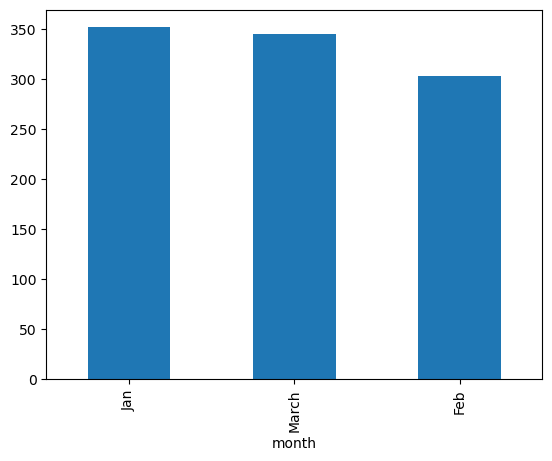

In [42]:
data['month']=data['Date'].dt.month.map(month_mapping)

data['month'].value_counts().plot(kind='bar')

